# Introdução a Manipulação de Dados Geoespaciais

Neste curso vamos fazer uso da biblioteca geopandas para manipular dados georeferenciados, ou seja, dados que possuem informações espaciais, tais como latitude e longitude. A biblioteca geopandas é uma extensão da biblioteca pandas, logo seu  funcionamento ocorre de forma semelhante. Em conjuntos de dados geopandas as bases contém a parte do dataframe e uma parte geométrica, a qual contém as informações da geometria espacial dos dados (Shape). 

Neste trabalho vamos realizar uma análise do número de roubos ocorridos no estado de São Paulo. Os dados podem ser consultados no seguinte endereço web: [página oficial do IBGE](https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html?=&t=acesso-ao-produto). 

Dados espaciais podem ser armazenados em diferentes padrões de arquivos, atualmente os mais empregados são: Shapefile, GeoJSON, NetCF4 (Big Data), KML e GPKG. No nosso caso, temos os dados do município no formato shapefile (Após descompactar a pasta .zip, vamos lê apenas o arquivo com a extensão .shp). 

In [1]:
# Carregando a biblioteca geopandas
import geopandas as gpd

In [2]:
# Lê o arquivo Shapefile
data = gpd.read_file("/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/SP_Municipios_2021/SP_Municipios_2021.shp")

# Vendo o tipo da variavel data
type(data)

geopandas.geodataframe.GeoDataFrame

## Analisando os Dados

In [3]:
# Vendo uma parte dos dados
data.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."


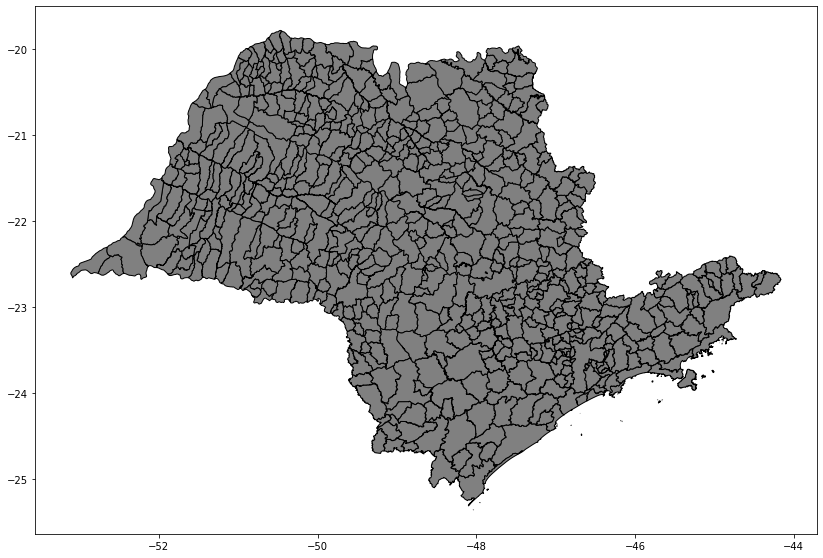

In [5]:
# Criando um mapa para os dados geométricos (Depende da lib descartes, instale)

data.plot(figsize = (14, 12), facecolor="gray", edgecolor="black");

In [8]:
# Filtrando os dados para a capital

data_sp = data[data["NM_MUN"] == "São Paulo"]
data_sp.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
562,3550308,São Paulo,SP,1521.202,"POLYGON ((-46.54624 -23.35791, -46.54585 -23.3..."


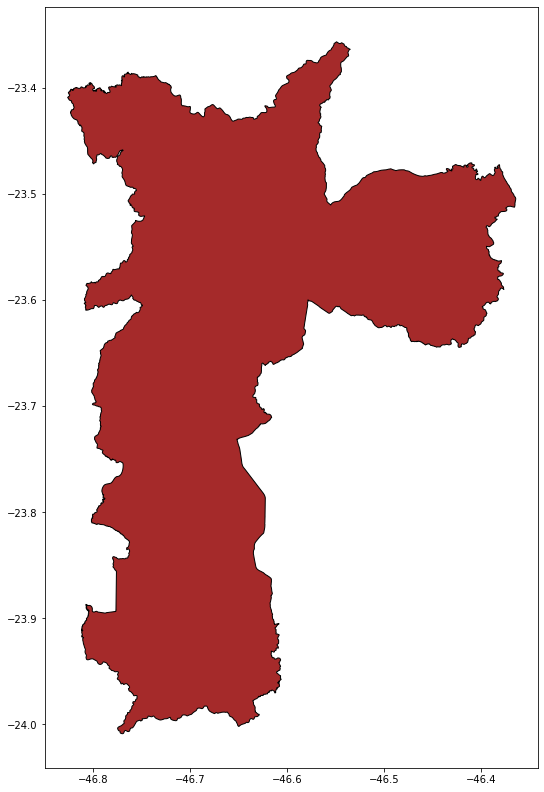

In [11]:
# Pltando um gráfico para a cidade de São Paulo

data_sp.plot(figsize = (10, 14), facecolor="brown", edgecolor="black");

In [12]:
# Salvando o arquivo no formato shapefile
data_sp.to_file("/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/SP_Municipios_2021/Capital_Shape/Shapefile/sao_paulo_capital.shp")

/home/wesley/geoprocess/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [13]:
# Salvando o arquivo no formato Json
data_sp.to_file("/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/SP_Municipios_2021/Capital_Shape/GeoJson/sao_paulo_capital.json", driver="GeoJSON")

/home/wesley/geoprocess/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [14]:
# Lendo os dados no formato Json

data_json = gpd.read_file("/home/wesley/Downloads/DatasetsTutorials/GeopandasCurse/SP_Municipios_2021/Capital_Shape/GeoJson/sao_paulo_capital.json", driver="GeoJSON")

data_json.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3550308,São Paulo,SP,1521.202,"POLYGON ((-46.54624 -23.35791, -46.54585 -23.3..."
